In [ ]:
#Importing libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#Importing Sequential, Dense, SimpleRNN from tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [ ]:
#Import TimeseriesGenerator

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

#Import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Create the sine-wave using Numpy

x = np.linspace(0,70,750)
y = np.sin(x)

In [ ]:
# Print value of x

x

array([ 0.        ,  0.09345794,  0.18691589,  0.28037383,  0.37383178,
        0.46728972,  0.56074766,  0.65420561,  0.74766355,  0.8411215 ,
        0.93457944,  1.02803738,  1.12149533,  1.21495327,  1.30841121,
        1.40186916,  1.4953271 ,  1.58878505,  1.68224299,  1.77570093,
        1.86915888,  1.96261682,  2.05607477,  2.14953271,  2.24299065,
        2.3364486 ,  2.42990654,  2.52336449,  2.61682243,  2.71028037,
        2.80373832,  2.89719626,  2.99065421,  3.08411215,  3.17757009,
        3.27102804,  3.36448598,  3.45794393,  3.55140187,  3.64485981,
        3.73831776,  3.8317757 ,  3.92523364,  4.01869159,  4.11214953,
        4.20560748,  4.29906542,  4.39252336,  4.48598131,  4.57943925,
        4.6728972 ,  4.76635514,  4.85981308,  4.95327103,  5.04672897,
        5.14018692,  5.23364486,  5.3271028 ,  5.42056075,  5.51401869,
        5.60747664,  5.70093458,  5.79439252,  5.88785047,  5.98130841,
        6.07476636,  6.1682243 ,  6.26168224,  6.35514019,  6.44

In [ ]:
# Print value of y

y

array([ 0.00000000e+00,  9.33219537e-02,  1.85829390e-01,  2.76714902e-01,
        3.65185238e-01,  4.50468225e-01,  5.31819511e-01,  6.08529060e-01,
        6.79927348e-01,  7.45391208e-01,  8.04349270e-01,  8.56286947e-01,
        9.00750923e-01,  9.37353118e-01,  9.65774064e-01,  9.85765704e-01,
        9.97153550e-01,  9.99838207e-01,  9.93796246e-01,  9.79080399e-01,
        9.55819107e-01,  9.24215396e-01,  8.84545104e-01,  8.37154474e-01,
        7.82457133e-01,  7.20930482e-01,  6.53111527e-01,  5.79592193e-01,
        5.01014160e-01,  4.18063260e-01,  3.31463491e-01,  2.41970698e-01,
        1.50365977e-01,  5.74488566e-02, -3.59696790e-02, -1.29074270e-01,
       -2.21052297e-01, -3.11100972e-01, -3.98434348e-01, -4.82290177e-01,
       -5.61936562e-01, -6.36678346e-01, -7.05863182e-01, -7.68887221e-01,
       -8.25200389e-01, -8.74311181e-01, -9.15790958e-01, -9.49277682e-01,
       -9.74479081e-01, -9.91175195e-01, -9.99220301e-01, -9.98544180e-01,
       -9.89152734e-01, -

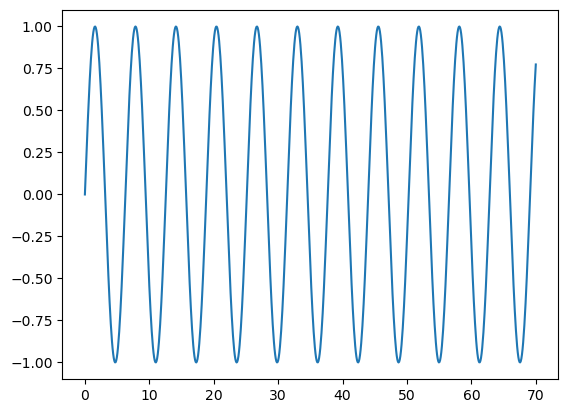

In [ ]:
#Draw plot using x and y values

plt.plot(x, y)

In [ ]:
#Index: x; Data: y; column label: Sine

df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [ ]:
#Print the first five rows of the data frame

df.head(5)

,Sine
0.000000,0.000000
0.093458,0.093322
0.186916,0.185829
0.280374,0.276715
0.373832,0.365185


In [ ]:
#Print the length of the dataframe

len(df)

750

<h3>Split Data --> Train/Test (Test 20% and Training 80%)</h3>

In [ ]:
#Testing data is 20%

test_percent = 0.2

In [ ]:
#Check the number of data points reserved for testing

len(df)*test_percent

150.0

In [ ]:
#Round the test dataset to the nearest decimal

test_length = np.round(len(df)*test_percent)

In [ ]:
#Print rounded value of the test data

test_length

150.0

In [ ]:
#Index starts with 0

test_start_index = int(len(df) - test_length)

In [ ]:
#Print test start index

test_start_index

600

In [ ]:
#Create separate training/testing datasets

data_train = df.iloc[: test_start_index]

data_test = df.iloc[test_start_index :]

In [ ]:
#Print train data first five rows

data_train.head(5)

,Sine
0.000000,0.000000
0.093458,0.093322
0.186916,0.185829
0.280374,0.276715
0.373832,0.365185


In [ ]:
#Print test first five rows

data_test.head(5)

,Sine
56.074766,-0.456361
56.168224,-0.371332
56.261682,-0.283062
56.355140,-0.192322
56.448598,-0.099903


<h3>Normalize Data (Scale it into the range [0, 1])</h3>

In [ ]:
#Create a MinMaxScaler to normalize the data, rante is 0 and 1

scaler = MinMaxScaler()

In [ ]:
#Scaling the train data, Train the scaler to perform the normalization

scaler.fit(data_train)

MinMaxScaler()

In [ ]:
#Normalize the training dataset

normalized_train = scaler.transform(data_train)

#Normalize the testing dataset

normalized_test = scaler.transform(data_test)

<h3>Create TimeseriesGenerator instance</h3>

In [ ]:
#TimeseriesGenerator: Generate time series batches for training/testing

#set the length of the input sequence
#i.e., the number of time series steps that are used to predict the future one
#Use 70 historical data points to predict the subsequent one

length = 70

#batch size: Number of time series samples in each batch
#One sample: each sample is a time series input sequence
#Only one sample in each batch

batch_size = 1

#Create a TimeSeriesGenerator for training: train_tsGenerator, this will produce time series batches used to train the model
#TimeSeriesGenerator (inputs dataset, outputs dataset, length, batch_size)

train_tsGenerator70 = TimeseriesGenerator(normalized_train, normalized_train, length=length, batch_size=batch_size)

In [ ]:
#Here is the First batch

X,y = train_tsGenerator70[0]

In [ ]:
#Print X.flatten

X.flatten()

array([5.00000345e-01, 5.46661577e-01, 5.92915550e-01, 6.38358555e-01,
       6.82593965e-01, 7.25235693e-01, 7.65911559e-01, 8.04266544e-01,
       8.39965884e-01, 8.72697993e-01, 9.02177186e-01, 9.28146167e-01,
       9.50378277e-01, 9.68679475e-01, 9.82890026e-01, 9.92885901e-01,
       9.98579855e-01, 9.99922191e-01, 9.96901193e-01, 9.89543230e-01,
       9.77912520e-01, 9.62110578e-01, 9.42275323e-01, 9.18579878e-01,
       8.91231058e-01, 8.60467563e-01, 8.26557899e-01, 7.89798031e-01,
       7.50508799e-01, 7.09033122e-01, 6.65732999e-01, 6.20986357e-01,
       5.75183745e-01, 5.28724931e-01, 4.82015406e-01, 4.35462856e-01,
       3.89473590e-01, 3.44449005e-01, 3.00782078e-01, 2.58853933e-01,
       2.19030522e-01, 1.81659425e-01, 1.47066818e-01, 1.15554625e-01,
       8.73978866e-02, 6.28423557e-02, 4.21023536e-02, 2.53588996e-02,
       1.27581312e-02, 4.41002827e-03, 3.87453322e-04, 7.25515509e-04,
       5.42126422e-03, 1.44337148e-02, 2.76842063e-02, 4.50570880e-02,
      

In [ ]:
#Print y: What does X predict

y

array([[0.6279956]])

<h3>Build, Train, and Test Model</h3></n><h3>Build SimpleRNN Model</h3>

In [ ]:
#Data set: Only one column/attribute: Sine values of index x
#Features: How many features used to train the model: only one

n_features = 1

#define the model

model = Sequential()

#Add a simple RNN layer: Using SimpleRNN cells
#This layer has 70neurons: One neuron for each input data point

model.add(SimpleRNN(70, input_shape=(length, n_features)))

#Add a fully-connected (FC) layer for the final prediction
#Only one neuron of the Dense/Fully-connected layer
#Output: Predict the next data point of the input sequence: only one value

model.add(Dense(1))

<h3>Compile Model</h3>

In [ ]:
#Compile the model
#Optimizer: Adam
#Loss function: mse (Mean Squared Errors)-As it is a regression problem we are using MSE

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 70)                5040      
                                                                 
 dense (Dense)               (None, 1)                 71        
                                                                 
Total params: 5,111
Trainable params: 5,111
Non-trainable params: 0
_________________________________________________________________


<h3>Train (fit) Model</h3>

In [ ]:
#Fit the model
#Use fit_generator(), Not fit()

model.fit_generator(train_tsGenerator70,epochs=15)

C:\Users\hp\AppData\Local\Temp\ipykernel_4332\4243977687.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_tsGenerator70,epochs=15)


Epoch 1/15
530/530 [==============================] - 13s 19ms/step - loss: 0.0054
Epoch 2/15
530/530 [==============================] - 11s 20ms/step - loss: 2.3379e-04
Epoch 3/15
530/530 [==============================] - 12s 22ms/step - loss: 1.2974e-05
Epoch 4/15
530/530 [==============================] - 13s 25ms/step - loss: 8.4749e-05
Epoch 5/15
530/530 [==============================] - 11s 21ms/step - loss: 3.7818e-05
Epoch 6/15
530/530 [==============================] - 11s 21ms/step - loss: 1.3276e-04
Epoch 7/15
530/530 [==============================] - 12s 23ms/step - loss: 1.8266e-05
Epoch 8/15
530/530 [==============================] - 11s 21ms/step - loss: 0.0048
Epoch 9/15
530/530 [==============================] - 10s 20ms/step - loss: 5.7102e-05
Epoch 10/15
530/530 [==============================] - 11s 20ms/step - loss: 1.4580e-05
Epoch 11/15
530/530 [==============================] - 12s 23ms/step - loss: 5.9413e-05
Epoch 12/15
530/530 [============================

<h3>Visualize Model's Performance after Training</h3>

<AxesSubplot:>

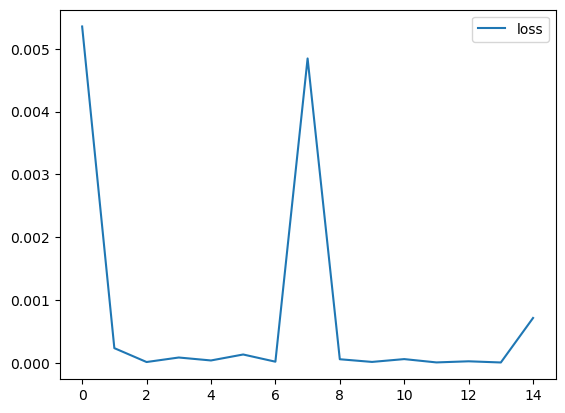

In [ ]:
#Load the loss data into a data frame

df_model_loss = pd.DataFrame(model.history.history)

#Visualize the loss data

df_model_loss.plot()

<h3>Evaluate Model on Test Data</h3>

In [ ]:
#Number of time steps of the input time series

length

70

In [ ]:
#Take a sneak peek into the 1st time series batch (70 data points)

first_eval_batch = normalized_train[-length : ]
first_eval_batch

array([[1.65532097e-01],
       [2.01676083e-01],
       [2.40423852e-01],
       [2.81437214e-01],
       [3.24358201e-01],
       [3.68812198e-01],
       [4.14411210e-01],
       [4.60757246e-01],
       [5.07445797e-01],
       [5.54069365e-01],
       [6.00221016e-01],
       [6.45497938e-01],
       [6.89504952e-01],
       [7.31857964e-01],
       [7.72187316e-01],
       [8.10141010e-01],
       [8.45387788e-01],
       [8.77620013e-01],
       [9.06556361e-01],
       [9.31944276e-01],
       [9.53562170e-01],
       [9.71221362e-01],
       [9.84767723e-01],
       [9.94083018e-01],
       [9.99085944e-01],
       [9.99732835e-01],
       [9.96018046e-01],
       [9.87973998e-01],
       [9.75670900e-01],
       [9.59216135e-01],
       [9.38753320e-01],
       [9.14461055e-01],
       [8.86551363e-01],
       [8.55267843e-01],
       [8.20883536e-01],
       [7.83698551e-01],
       [7.44037438e-01],
       [7.02246362e-01],
       [6.58690077e-01],
       [6.13748743e-01],


In [ ]:
#Reshape the first_eval_batch  to a 3D array

first_eval_batch = first_eval_batch.reshape((1, length, n_features))
first_eval_batch

array([[[1.65532097e-01],
        [2.01676083e-01],
        [2.40423852e-01],
        [2.81437214e-01],
        [3.24358201e-01],
        [3.68812198e-01],
        [4.14411210e-01],
        [4.60757246e-01],
        [5.07445797e-01],
        [5.54069365e-01],
        [6.00221016e-01],
        [6.45497938e-01],
        [6.89504952e-01],
        [7.31857964e-01],
        [7.72187316e-01],
        [8.10141010e-01],
        [8.45387788e-01],
        [8.77620013e-01],
        [9.06556361e-01],
        [9.31944276e-01],
        [9.53562170e-01],
        [9.71221362e-01],
        [9.84767723e-01],
        [9.94083018e-01],
        [9.99085944e-01],
        [9.99732835e-01],
        [9.96018046e-01],
        [9.87973998e-01],
        [9.75670900e-01],
        [9.59216135e-01],
        [9.38753320e-01],
        [9.14461055e-01],
        [8.86551363e-01],
        [8.55267843e-01],
        [8.20883536e-01],
        [7.83698551e-01],
        [7.44037438e-01],
        [7.02246362e-01],
        [6.5

In [ ]:
first_eval_batch.shape

(1, 70, 1)

<h3>Evaluate Model</h3>

In [ ]:
#Declare a list to store all the predictions

test_predictions = []

#Get the first time series batch for testing

first_eval_batch = normalized_train[-length: ]

#Reshape the batch into 3D array: #samples/batch x length x #features

current_batch = first_eval_batch.reshape((1, length, n_features))

#Run a FOR LOOP to make a prediction for each batch

for i in range(len(data_test)):

    #Get the value of the first element: The prediction
    current_pred = model.predict(current_batch)[0]

    #store prediction into the list of prediction
    test_predictions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 43ms/step


In [ ]:
#Convert the scaled result back to the real values

true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[-0.45820972],
       [-0.37492359],
       [-0.28875184],
       [-0.20018525],
       [-0.11015996],
       [-0.02011512],
       [ 0.06891835],
       [ 0.15607644],
       [ 0.24038865],
       [ 0.32108217],
       [ 0.39703202],
       [ 0.46721479],
       [ 0.530704  ],
       [ 0.58662501],
       [ 0.6343261 ],
       [ 0.67351415],
       [ 0.70381294],
       [ 0.72518168],
       [ 0.73761812],
       [ 0.7412578 ],
       [ 0.73640946],
       [ 0.72329795],
       [ 0.70240902],
       [ 0.67418506],
       [ 0.63923857],
       [ 0.59794339],
       [ 0.55094765],
       [ 0.49869243],
       [ 0.44159542],
       [ 0.38029882],
       [ 0.31518134],
       [ 0.24667762],
       [ 0.17536535],
       [ 0.10170037],
       [ 0.02618051],
       [-0.05062389],
       [-0.12824194],
       [-0.2060546 ],
       [-0.28342542],
       [-0.35978254],
       [-0.43443171],
       [-0.50674772],
       [-0.57606617],
       [-0.64169249],
       [-0.70307051],
       [-0

In [ ]:
data_test

,Sine
56.074766,-0.456361
56.168224,-0.371332
56.261682,-0.283062
56.355140,-0.192322
56.448598,-0.099903
...,...
69.626168,0.489163
69.719626,0.568423
69.813084,0.642722
69.906542,0.711411


In [ ]:
#Copy the true values of predictions into the data frame of original test data

data_test['Predictions'] = true_predictions

C:\Users\hp\AppData\Local\Temp\ipykernel_4332\3475043623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Predictions'] = true_predictions


In [ ]:
#Update data test

data_test

,Sine,Predictions
56.074766,-0.456361,-0.458210
56.168224,-0.371332,-0.374924
56.261682,-0.283062,-0.288752
56.355140,-0.192322,-0.200185
56.448598,-0.099903,-0.110160
...,...,...
69.626168,0.489163,0.435687
69.719626,0.568423,0.494351
69.813084,0.642722,0.546848
69.906542,0.711411,0.592610


<AxesSubplot:>

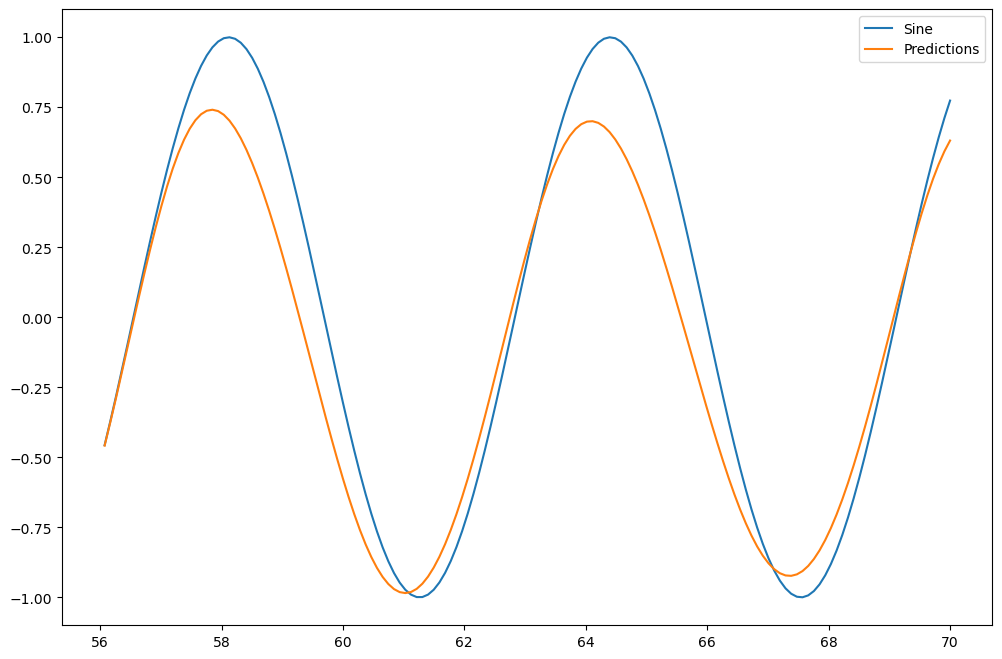

In [ ]:
#Visualize the data of the updated test data
#Compare the predicted sine wave against the original sine wave, each of them represented with a different color

data_test.plot(figsize=(12,8))

In [ ]:
vipin katakam